In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import HeNormal
from matplotlib import image
from matplotlib import pyplot
import os
import shutil
import numpy as np
from PIL import Image
import pickle


In [ ]:
ls "drive/MyDrive/CS 230 Final Project/Final Data and CSVs/Final CSV Files and Data/Binary Split/"

devSet.csv  dev_Y.p      test_X.p  trainSet.csv  train_Y.p
dev_X.p     testSet.csv  test_Y.p  train_X.p


In [ ]:
pathToData = "drive/MyDrive/CS 230 Final Project/Final Data and CSVs/Final CSV Files and Data/Binary Split/"
print(pathToData + "train_X.p")

drive/MyDrive/CS 230 Final Project/Final Data and CSVs/Final CSV Files and Data/Binary Split/train_X.p


In [ ]:
# load the train dataset
X_trainUnflat = pickle.load(open(pathToData+"train_X.p", 'rb'))
y_trainUnflat = pickle.load(open(pathToData+"train_Y.p", 'rb'))

print(X_trainUnflat.shape)
print(y_trainUnflat.shape)

X_train = X_trainUnflat.reshape(X_trainUnflat.shape[0],-1)
y_train = y_trainUnflat.reshape(y_trainUnflat.shape[0],-1)

print(X_train.shape)
print(y_train.shape)

# load the dev dataset
X_devUnflat = pickle.load(open(pathToData+"dev_X.p", 'rb'))
y_devUnflat = pickle.load(open(pathToData+"dev_Y.p", 'rb'))

print(X_devUnflat.shape)
print(y_devUnflat.shape)

X_dev = X_devUnflat.reshape(X_devUnflat.shape[0],-1)
y_dev = y_devUnflat.reshape(y_devUnflat.shape[0],-1)

print(X_dev.shape)
print(y_dev.shape)

# load the test dataset
X_testUnflat = pickle.load(open(pathToData+"test_X.p", 'rb'))
y_testUnflat = pickle.load(open(pathToData+"test_Y.p", 'rb'))

print(X_testUnflat.shape)
print(y_testUnflat.shape)

X_test = X_testUnflat.reshape(X_testUnflat.shape[0],-1)
y_test = y_testUnflat.reshape(y_testUnflat.shape[0],-1)

print(X_test.shape)
print(y_test.shape)

numDims = X_train.shape[1]
numExamples = X_train.shape[0]

neurons1 = int(numDims/240)
neurons2 = int(numDims/480)
neurons3 = int(numDims/960)
neurons4 = int(numDims/1920)
neurons5 = int(numDims/3840)
neurons6 = int(numDims/7680)

print(neurons1)
print(neurons2)
print(neurons3)
print(neurons4)
print(neurons5)
print(neurons6)


(4246, 208, 160, 3)
(4246,)
(4246, 99840)
(4246, 1)
(910, 208, 160, 3)
(910,)
(910, 99840)
(910, 1)
(910, 208, 160, 3)
(910,)
(910, 99840)
(910, 1)
416
208
104
52
26
13


In [ ]:
#HYPERPARAMETER SEARCH OVER EPOCH NUMBER and BATCH SIZE
#We keep number of layers, neuron per layer, activation in each layer constant
batchSizes = [5,10,50,100,200]

print(batchSizes)
numEpochs = 30


[5, 10, 50, 100, 200]


In [ ]:
trainAccuracy = []
valAccuracy = []
trainLoss = []
valLoss = []

for batchSize in batchSizes:
  print("BatchSize : ", batchSize)
  model = Sequential()
  model.add(Dense(neurons1, input_dim=numDims, activation='relu', kernel_initializer=HeNormal()))
  model.add(Dense(neurons2, activation='relu', kernel_initializer=HeNormal()))
  model.add(Dense(neurons3, activation='relu', kernel_initializer=HeNormal()))
  model.add(Dense(neurons4, activation='relu', kernel_initializer=HeNormal()))
  model.add(Dense(neurons5, activation='relu', kernel_initializer=HeNormal()))
  model.add(Dense(neurons6, activation='relu', kernel_initializer=HeNormal()))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  history = model.fit(X_train, y_train, epochs=numEpochs, batch_size=batchSize, validation_data = (X_dev, y_dev))
  historyDict = history.history
  trainAccuracy.append(historyDict["accuracy"])
  valAccuracy.append(historyDict["val_accuracy"])
  trainLoss.append(historyDict['loss'])
  valLoss.append(historyDict['val_loss'])
  

  

BatchSize :  5
Epoch 1/30
850/850 [==============================] - 18s 20ms/step - loss: 133.3460 - accuracy: 0.5864 - val_loss: 3.5429 - val_accuracy: 0.6802
Epoch 2/30
850/850 [==============================] - 17s 20ms/step - loss: 10.6850 - accuracy: 0.6055 - val_loss: 0.9311 - val_accuracy: 0.6901
Epoch 3/30
850/850 [==============================] - 17s 20ms/step - loss: 2.6780 - accuracy: 0.6048 - val_loss: 0.6965 - val_accuracy: 0.6758
Epoch 4/30
850/850 [==============================] - 17s 20ms/step - loss: 0.6625 - accuracy: 0.6665 - val_loss: 0.6271 - val_accuracy: 0.6824
Epoch 5/30
850/850 [==============================] - 17s 20ms/step - loss: 0.7858 - accuracy: 0.6660 - val_loss: 0.6249 - val_accuracy: 0.6824
Epoch 6/30
850/850 [==============================] - 16s 19ms/step - loss: 0.6672 - accuracy: 0.6672 - val_loss: 0.6252 - val_accuracy: 0.6824
Epoch 7/30
850/850 [==============================] - 16s 19ms/step - loss: 0.6366 - accuracy: 0.6672 - val_loss: 0.62

In [ ]:
#print(trainAccuracy)
print(len(trainAccuracy))
for i in trainAccuracy:
  print(i)
  print(len(i))


In [ ]:
print(len(valAccuracy))

for i in valAccuracy:
  print(i)
  print(len(i))

In [ ]:
print(len(trainLoss))
for i in trainLoss:
  print(i)
  print(len(i))


In [ ]:
print(len(valLoss))
for i in valLoss:
  print(i)
  print(len(i))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


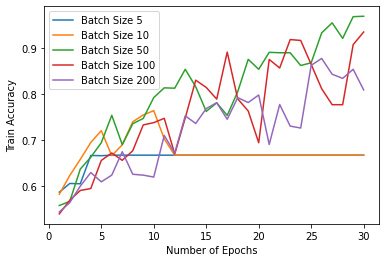

In [ ]:
#For Accuracy Plotting

x = [i for i in range(1,numEpochs+1)]
print(x)
yTrainAcc = trainAccuracy
#Train Accuracies
for i in range(len(batchSizes)):
  currBatchSize = batchSizes[i]
  labelName = "Batch Size " + str(currBatchSize)
  pyplot.plot(x, yTrainAcc[i],label=labelName)

pyplot.legend()
pyplot.xlabel("Number of Epochs")
pyplot.ylabel("Train Accuracy")
pyplot.show()




[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


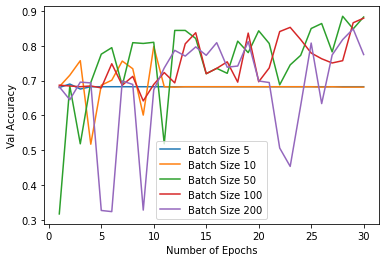

In [ ]:
#For Accuracy Plotting

x = [i for i in range(1,numEpochs+1)]
print(x)
yValAcc = valAccuracy
#Val Accuracies
for i in range(len(batchSizes)):
  currBatchSize = batchSizes[i]
  labelName = "Batch Size " + str(currBatchSize)
  pyplot.plot(x, yValAcc[i],label=labelName)

pyplot.legend()
pyplot.xlabel("Number of Epochs")
pyplot.ylabel("Val Accuracy")
pyplot.show()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


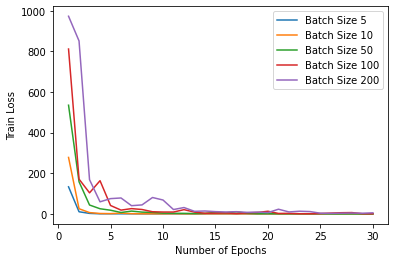

In [ ]:
#For Loss Plotting

x = [i for i in range(1,numEpochs+1)]
print(x)
yTrainLoss = trainLoss
for i in range(len(batchSizes)):
  currBatchSize = batchSizes[i]
  labelName = "Batch Size " + str(currBatchSize)
  pyplot.plot(x, yTrainLoss[i],label=labelName)

pyplot.legend()
pyplot.xlabel("Number of Epochs")
pyplot.ylabel("Train Loss")
pyplot.show()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


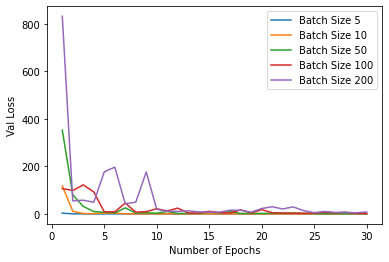

In [ ]:
#For Loss Plotting

x = [i for i in range(1,numEpochs+1)]
print(x)
yValLoss = valLoss
for i in range(len(batchSizes)):
  currBatchSize = batchSizes[i]
  labelName = "Batch Size " + str(currBatchSize)
  pyplot.plot(x, yValLoss[i],label=labelName)

pyplot.legend()
pyplot.xlabel("Number of Epochs")
pyplot.ylabel("Val Loss")
pyplot.show()

In [ ]:
bestBatchSize = 50
bestIndexBS = batchSizes.index(bestBatchSize)

bestValLoss = valLoss[bestIndexBS]
bestValAccuracy = valAccuracy[bestIndexBS]

print(bestValAccuracy)
print(max(bestValAccuracy))
print(bestValAccuracy.index(max(bestValAccuracy)))
bestEpoch = bestValAccuracy.index(max(bestValAccuracy))

[0.3175824284553528, 0.6846153736114502, 0.5186813473701477, 0.694505512714386, 0.7758241891860962, 0.7945054769515991, 0.6857143044471741, 0.8087912201881409, 0.8065934181213379, 0.80989009141922, 0.5186813473701477, 0.8439560532569885, 0.8439560532569885, 0.8208791017532349, 0.7197802066802979, 0.7351648211479187, 0.7208791375160217, 0.8131868243217468, 0.7802197933197021, 0.8428571224212646, 0.8065934181213379, 0.687912106513977, 0.7450549602508545, 0.7725274562835693, 0.8494505286216736, 0.8637362718582153, 0.7824175953865051, 0.8846153616905212, 0.8483516573905945, 0.8824175596237183]
0.8846153616905212
27
